# Classifying Terrorism Attack Types Using Machine Learning
---
In this project, we will demonstrate how can we exploit past terrorism incident records using machine learning.
- For dataset, we will use global terrorism database
    - The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 to 2017.
    - The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.
    - The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
    
---

## Content
1) **Problem Definition**
- Defining goals
- Identifying expected outcomes

2) **Data Collection and Exploration**
- Obtaining data
- Exploring the data

3) **Data Preprocessing**
- Data cleaning
- Feature engineering

4) **Model Design and Development**
- Classification model
    - Logistic Regression
    - Support Vector Machines
    - Bernoulli Naive Bayes
    - K Nearest Neighbors

5) **Model Evaluation and Testing**
- Accuracy
- Precision and recall
- F1-Score
- Confusion matrix

7) **Analysis and Interpretation**
- Identify trends and patterns in the predictions

9) **Iteration and Future Scope**
- Based on feedback, refine models and methods.
- Propose future enhancements

---

## 1. Problem Definition
The objective is to develop machine learning models to analyze historical terrorism data. These models will:
- Classify the type of potential terrorist attacks based on factors such as location, weapon type, target etc..

This project aims to assist policymakers and security agencies in identifying high-risk areas and potential attack types, enabling more effective resource allocation and prevention strategies.

---

## 2. Data Collection and Exploration
We will use global terrorism database. https://www.start.umd.edu/gtd/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import kagglehub
import os
# Load the GTD dataset

# Download latest version from Kaggle
path = kagglehub.dataset_download("START-UMD/gtd")
print("Path to dataset files:", path)

file_path = os.path.join(path, "globalterrorismdb_0718dist.csv")
data = pd.read_csv(file_path, encoding = 'latin1', low_memory=False)

100%|██████████| 28.7M/28.7M [00:00<00:00, 54.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/START-UMD/gtd/versions/3


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print("Dataset Preview: ")
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Dataset Preview: 
Number of rows: 181691
Number of columns: 135


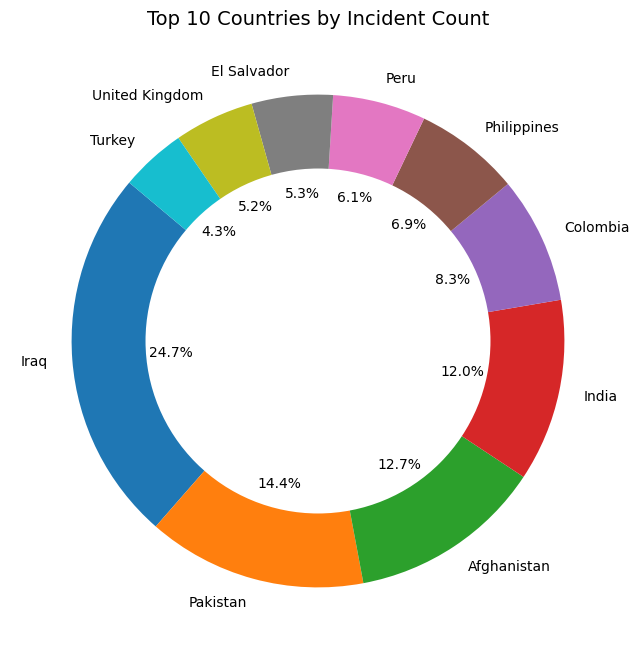

In [5]:
top_countries = data['country_txt'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 10 Countries by Incident Count', fontsize=14)
plt.show()

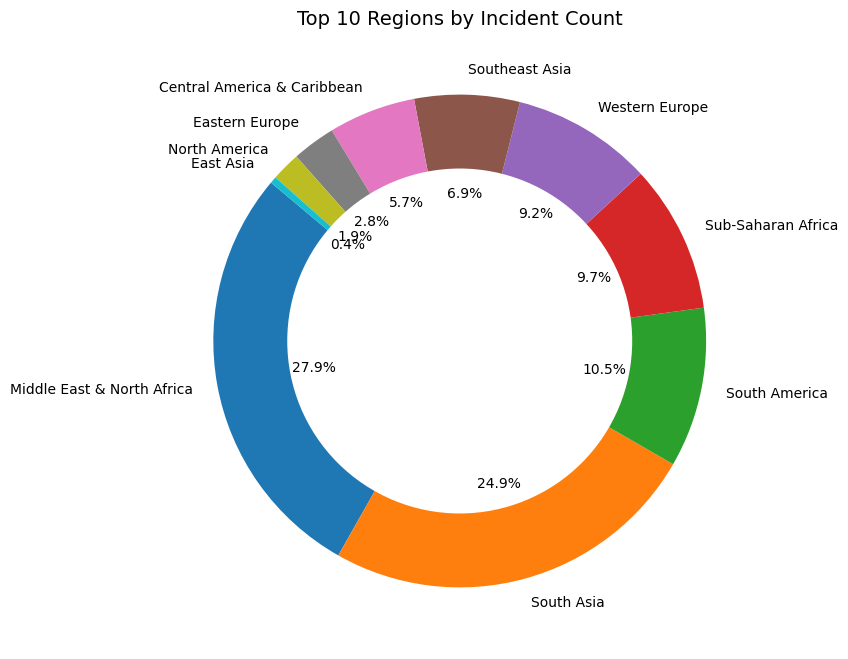

In [6]:
top_regions = data['region_txt'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 10 Regions by Incident Count', fontsize=14)
plt.show()

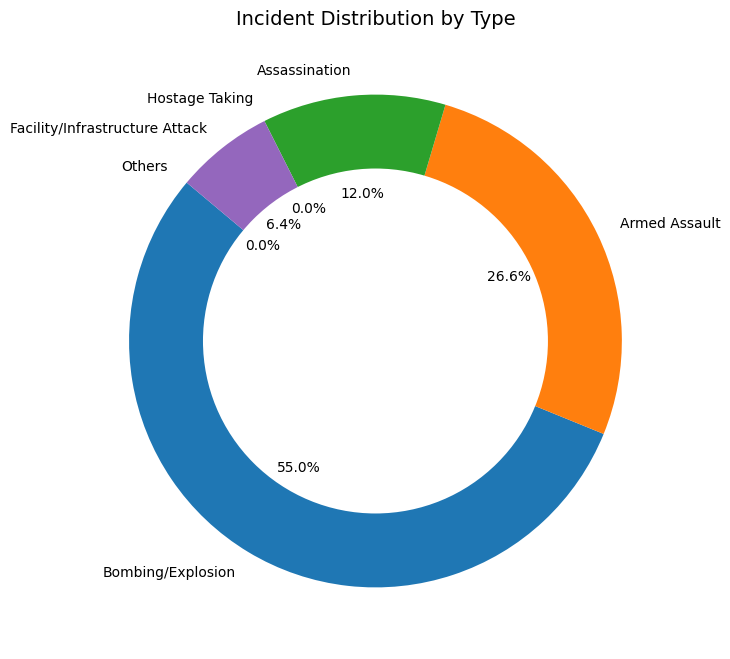

In [7]:
attack_type_counts = data['attacktype1_txt'].value_counts()

labels = ['Bombing/Explosion', 'Armed Assault', 'Assassination',
          'Hostage Taking', 'Facility/Infrastructure Attack', 'Others']

counts = [attack_type_counts[label] if label in attack_type_counts else 0 for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Incident Distribution by Type', fontsize=14)
plt.show()

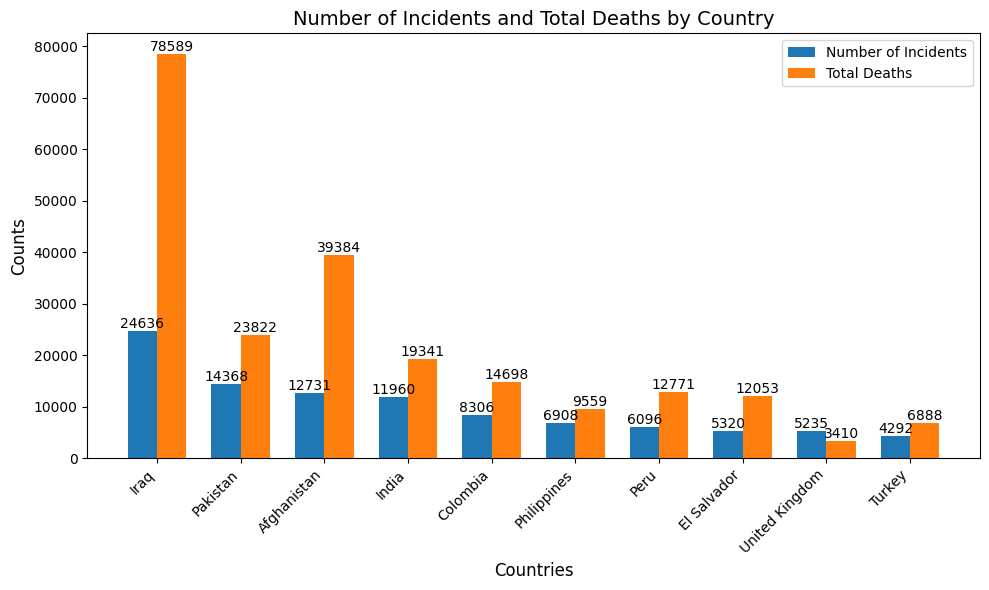

In [8]:
deaths_by_country = data.groupby('country_txt')['nkill'].sum()
incidents_by_country = data['country_txt'].value_counts()

combined_data = pd.DataFrame({
    'Total Deaths': deaths_by_country,
    'Number of Incidents': incidents_by_country
}).fillna(0)

combined_data = combined_data.sort_values('Number of Incidents', ascending=False).head(10)

countries = combined_data.index
deaths = combined_data['Total Deaths']
incidents = combined_data['Number of Incidents']

x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, incidents, width, label='Number of Incidents')
bars2 = ax.bar(x + width/2, deaths, width, label='Total Deaths')

ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Number of Incidents and Total Deaths by Country', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

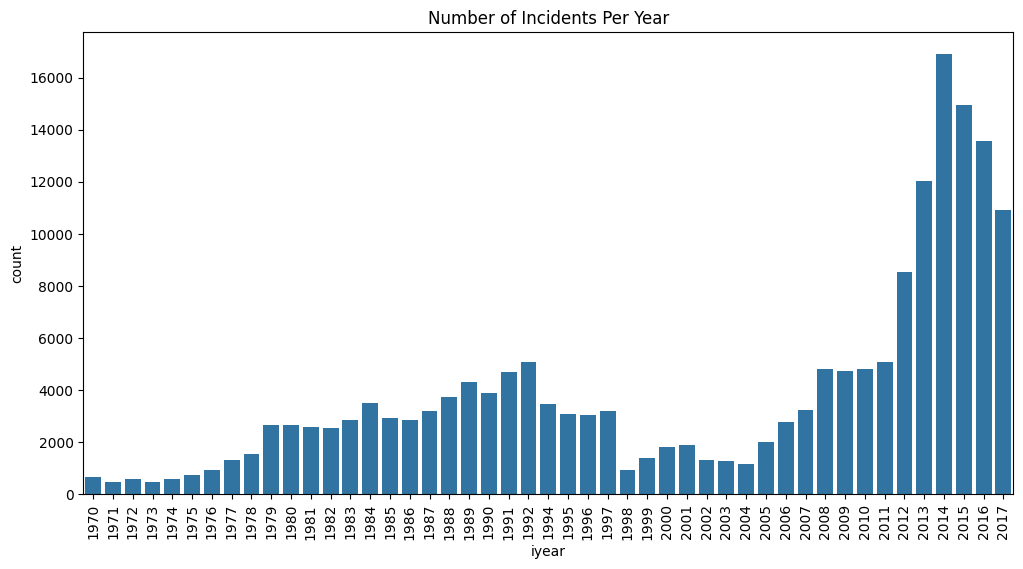

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='iyear', data=data)
plt.title('Number of Incidents Per Year')
plt.xticks(rotation=90)
plt.show()

---
## Data Preprocessing
This section performs these processes:
1) Dropping duplicates
2) Dropping columns that contains more than 40 percent NaN values
3) Removes rows that contains NaN values
3) Dropping rows with 'iyear' as 0
4) Dropping rows with 'imonth' as 0
5) Dropping rows with 'iday' as 0
6) Dropping rows with 'attacktype1_txt' as "Unknown" in place
7) Dropping rows with 'targtype1_txt' as "Unknown" in place
8) Dropping rows with 'gname' as "Unknown" in place
9) Dropping rows with 'weaptype1_txt' as "Unknown" in place
10) Encoding categorical features
11) Scaling numerical features

Firstly, let's preview the features

In [10]:
data.shape

(181691, 135)

**Dropping Duplicates**

In [11]:
data = data.drop_duplicates()

data.shape

(181691, 135)

**Dropping columns that contains more than 40 percent NaN values**

In [12]:
missing_values = data.isnull().sum()

# Threshold
threshold = 0.4

# Identify columns to drop
missing_percentage = data.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > threshold].index
data = data.drop(columns=cols_to_drop)

cols_to_drop

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

In [13]:
data.shape

(181691, 58)

**Dropping NaN rows**

In [14]:
features = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'targtype1_txt',
            'natlty1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound']

target = 'attacktype1'

data.dropna(subset=features, inplace=True)

data.shape

(163315, 58)

1. **Dropping rows with 'iyear' as 0**
2. **Dropping rows with 'imonth' as 0**
3. **Dropping rows with 'iday' as 0**

In [15]:
data = data[data['iyear'] != 0]
data = data[data['imonth'] != 0]
data = data[data['iday'] != 0]

data.shape

(162635, 58)

1. **Dropping rows with 'attacktype1_txt' as "Unknown" in place**
2. **Dropping rows with 'targtype1_txt' as "Unknown" in place**
3. **Dropping rows with 'gname' as "Unknown" in place**
4. **Dropping rows with 'weaptype1_txt' as "Unknown" in place**

In [16]:
data = data[data['attacktype1_txt'] != "Unknown"]
data = data[data['targtype1_txt'] != "Unknown"]
data = data[data['gname'] != "Unknown"]
data = data[data['weaptype1_txt'] != "Unknown"]

data.shape

(75809, 58)

**Calculate percentages of zero, non-zero and NaN values for features**

In [17]:
columns_to_check = features

for column in columns_to_check:
    if column in data.columns:
        # Total rows in the column
        total_count = data[column].shape[0]

        # Count non-zero values
        nonzero_count = (data[column] != 0).sum()

        # Count zero values
        zero_count = (data[column] == 0).sum()

        # Handle missing values (NaN) if they exist
        nan_count = data[column].isna().sum()

        # Calculate percentages
        nonzero_percentage = (nonzero_count / total_count) * 100
        zero_percentage = (zero_count / total_count) * 100

        print(f"Column '{column}':")
        print(f"  Non-zero percentage: {nonzero_percentage:.2f}%")
        print(f"  Zero percentage: {zero_percentage:.2f}%")
        print(f"  Missing/NaN percentage: {(nan_count / total_count) * 100:.2f}%\n")
    else:
        print(f"Column '{column}' not found in the dataset.")

Column 'iyear':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'imonth':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'iday':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'country_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'region_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'targtype1_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'natlty1_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'gname':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'weaptype1_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'nkill':
  Non-

**Encoding categorical features and scaling numerical features**

We will use one-hot encoding and standart scaler to perform this.

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
numerical_cols = ['iyear', 'imonth', 'iday', 'nkill', 'nwound']
categorical_cols = ['country_txt', 'region_txt', 'targtype1_txt',
                    'natlty1_txt', 'gname', 'weaptype1_txt']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

---
## Model Design and Development
We will create a pipeline for testing different classification methods
- Logistic Regression
- Support Vector Machines
- Bernoulli Naive Bayes
- K Nearest Neighbors

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [22]:
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['iyear', 'imonth', 'iday',
                                                   'nkill', 'nwound']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_txt', 'region_txt',
                                                   'targtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

**Support Vector Machines**

In [23]:
from sklearn.svm import SVC

In [24]:
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['iyear', 'imonth', 'iday',
                                                   'nkill', 'nwound']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_txt', 'region_txt',
                                                   'targtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt'])])),
                ('classifier', SVC())])

**Gaussian Naive Bayes**

In [25]:
from sklearn.naive_bayes import BernoulliNB

In [26]:
pipeline_bnb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BernoulliNB())
])

pipeline_bnb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['iyear', 'imonth', 'iday',
                                                   'nkill', 'nwound']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_txt', 'region_txt',
                                                   'targtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt'])])),
                ('classifier', BernoulliNB())])

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['iyear', 'imonth', 'iday',
                                                   'nkill', 'nwound']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_txt', 'region_txt',
                                                   'targtype1_txt',
                                                   'natlty1_txt', 'gname',
                                                   'weaptype1_txt'])])),
                ('classifier', KNeighborsClassifier())])

---
## Model Evaluation and Performance Metrics
- Accuracy
- Precision and recall
- F1-Score
- Confusion matrix

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

For the sake of clarity, let's show the corresponding name of each number in 'attacktype1' column

In [30]:
attacktype_mapping = data[['attacktype1', 'attacktype1_txt']].drop_duplicates().set_index('attacktype1')['attacktype1_txt'].to_dict()

print("Mapping of attacktype1 to attacktype1_txt:")
for key, value in attacktype_mapping.items():
    print(f"{key}: {value}")

Mapping of attacktype1 to attacktype1_txt:
2: Armed Assault
1: Assassination
7: Facility/Infrastructure Attack
3: Bombing/Explosion
6: Hostage Taking (Kidnapping)
4: Hijacking
8: Unarmed Assault
5: Hostage Taking (Barricade Incident)


**Logistic Regression results**

In [31]:
y_pred = pipeline_logreg.predict(X_test)

print("Test Accuracy:", pipeline_logreg.score(X_test, y_test))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8279910302070966
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.48      0.55      1629
           2       0.74      0.83      0.79      4472
           3       0.93      0.98      0.95      7075
           4       0.48      0.20      0.29        49
           5       0.71      0.30      0.42       121
           6       0.53      0.22      0.31       646
           7       0.85      0.80      0.82      1069
           8       0.68      0.51      0.59       101

    accuracy                           0.83     15162
   macro avg       0.69      0.54      0.59     15162
weighted avg       0.81      0.83      0.82     15162

Confusion Matrix:
[[ 783  551  247    1    2   31   12    2]
 [ 324 3719  232    6    8   69  109    5]
 [  18   77 6953    2    3    0   18    4]
 [   1   21    9   10    1    5    1    1]
 [  13   43   21    1   36    3    3    1]
 [  67  391   29    0    1  144   11    3]
 [  12  171    6

**Support Vector Machines results**

In [32]:
y_pred = pipeline_svm.predict(X_test)

print("Test Accuracy:", pipeline_svm.score(X_test, y_test))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8317504287033373
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.50      0.56      1629
           2       0.75      0.84      0.79      4472
           3       0.93      0.98      0.95      7075
           4       0.59      0.20      0.30        49
           5       0.83      0.28      0.42       121
           6       0.62      0.21      0.31       646
           7       0.85      0.83      0.84      1069
           8       0.74      0.42      0.53       101

    accuracy                           0.83     15162
   macro avg       0.74      0.53      0.59     15162
weighted avg       0.82      0.83      0.82     15162

Confusion Matrix:
[[ 808  544  246    1    1   15   11    3]
 [ 331 3738  239    3    4   46  108    3]
 [  19   77 6958    1    1    0   17    2]
 [   1   21    9   10    0    3    4    1]
 [   7   49   22    1   34    2    5    1]
 [  76  391   30    0    1  136   12    0]
 [  16  153    2

**Bernoulli Naive Bayes results**

In [33]:
y_pred = pipeline_bnb.predict(X_test)

print("Test Accuracy:", pipeline_bnb.score(X_test, y_test))

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8010156971375808
Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.48      0.52      1629
           2       0.75      0.75      0.75      4472
           3       0.93      0.98      0.95      7075
           4       1.00      0.00      0.00        49
           5       0.91      0.08      0.15       121
           6       0.38      0.38      0.38       646
           7       0.73      0.79      0.76      1069
           8       0.62      0.20      0.30       101

    accuracy                           0.80     15162
   macro avg       0.74      0.46      0.48     15162
weighted avg       0.80      0.80      0.79     15162

Confusion Matrix:
[[ 787  482  252    0    0   79   29    0]
 [ 432 3335  229    0    0  262  205    9]
 [  43  101 6903    0    1    1   26    0]
 [   5   23    9    0    0    7    5    0]
 [  30   40   22    0   10    4   15    0]
 [  64  299   27    0    0  244   12    0]
 [  19  167    8

**K Nearest Neighbors results**

In [34]:
y_pred = pipeline_knn.predict(X_test)

print("Test Accuracy:", pipeline_knn.score(X_test, y_test))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8083366310513125
Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.52      0.54      1629
           2       0.74      0.81      0.77      4472
           3       0.91      0.96      0.94      7075
           4       0.67      0.08      0.15        49
           5       0.61      0.26      0.36       121
           6       0.51      0.22      0.31       646
           7       0.84      0.72      0.78      1069
           8       0.90      0.35      0.50       101

    accuracy                           0.81     15162
   macro avg       0.72      0.49      0.54     15162
weighted avg       0.80      0.81      0.80     15162

Confusion Matrix:
[[ 845  507  236    0    4   23   12    2]
 [ 427 3633  234    0    9   90   79    0]
 [  90  163 6799    1    1    0   21    0]
 [   2   20   13    4    2    3    5    0]
 [  14   40   28    0   31    1    6    1]
 [  79  363   47    0    2  142   13    0]
 [  33  178   76

---
## Analysis and Interpretation
To evaluate the performance of the four classification models—Logistic Regression, Support Vector Machine (SVM), Bernoulli Naive Bayes (BNB), and k-Nearest Neighbors (kNN)—on the test dataset, various performance metrics such as accuracy, precision, recall, F1-score, and confusion matrices were analyzed. Below is the interpretation of the results:
1) **Logistic Regression**
- The model achieved an accuracy of 82.8%, indicating strong overall performance
- Class 3 (Bombing) has the highest F1-score (0.95) due to excellent precision (0.93) and recall (0.98). This suggests the model is highly effective at predicting this majority class.
- Class 4 (Hijacking) has the lowest recall (0.20) and F1-score (0.29), which indicates difficulty in identifying true positives for this rare class. Class 6 (Hostage Taking) also performed poorly, with a low F1-score (0.31) due to low recall (0.22).
- Misclassifications are more frequent for minority classes, showing room for improvement in handling class imbalance

2) **Support Vector Machines**
- SVM achieved a slightly higher accuracy (83.2%) compared to Logistic Regression.
- Class 7 (Facility Attack) saw an improved F1-score (0.84) compared to Logistic Regression, demonstrating better handling of this minority class. Precision and recall values were consistently high for the majority class 3.
- Similar to Logistic Regression, Class 4 (Hijacking) had poor performance with an F1-score of 0.30, indicating a systemic issue across models in predicting this class.
- The confusion matrix indicates fewer false negatives for majority classes, which contributes to the higher recall values overall.

3) **Bernoulli Naive Bayes**
- The accuracy of 80.0% is lower than that of Logistic Regression and SVM, suggesting BNB is less effective on this dataset.
- The F1-score for Class 3 (Bombing) remains high (0.95), but other classes, especially 4 (Hijacking) and 5 (Hostage Taking), exhibit substantial drops in performance. Class 4 has an F1-score of 0.00, and Class 5 has an F1-score of 0.15, largely due to poor recall.
- The model struggles to capture minority classes effectively, as seen in Classes 4, 5, and 8 (Unarmed Assault). This is likely due to its reliance on the Bernoulli distribution, which may not align well with the data's characteristics.
- A high number of misclassifications are observed for Classes 4 and 5, reinforcing the interpretation of poor minority class performance.

4) **K Nearest Neighbors**
- The model achieved an accuracy of 80.8%, slightly better than BNB but lower than Logistic Regression and SVM.
- Class 3 (Bombing) again has the highest F1-score (0.96), highlighting its dominant predictability across models. However, minority classes, such as 4, 5, and 8, show underwhelming performance. For instance, Class 4 has an F1-score of 0.15, and Class 8 has an F1-score of 0.35.
- kNN struggles with minority classes, reflecting its sensitivity to imbalanced datasets and noise. Class 6 also has low performance (F1-score 0.31) due to low recall (0.22).
- Errors are more dispersed across minority classes, indicating challenges in maintaining class balance during predictions.

*Trends and Patterns*
- Across all models, the majority class (3, Bombing) consistently achieves high precision, recall, and F1-scores, reflecting ease of classification for this dominant class.
- All models show a marked decline in performance for minority classes (e.g., 4, 5, 8), with BNB and kNN being the most affected.
- SVM slightly outperforms Logistic Regression in accuracy and F1-scores for key classes, making it the best model overall.
- BNB has the lowest accuracy and poorest performance on minority classes, indicating its unsuitability for this dataset.
- Logistic Regression balances performance across classes better than kNN and BNB while maintaining high accuracy.

---
## Iteration and Future Scope
**Iteration Based on Feedback**

From the analysis of the model performance, the following iterations are recommended to refine the models and improve their predictions:
- The consistent poor performance across all models for minority classes (e.g., 4, 5, and 8) highlights the need to tackle class imbalance. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique), adaptive boosting with class weights, or undersampling the majority class can be implemented to provide more balanced training data.
- Logistic Regression and SVM, which showed comparatively better performance, can be re-trained with class-weight adjustments to improve recall and F1-scores for underrepresented classes.

- Additional feature selection and engineering might enhance model performance. For example, adding domain-specific features or performing principal component analysis (PCA) for dimensionality reduction could help models like kNN and SVM perform better.

- Fine-tuning hyperparameters for each model using grid search or random search can improve accuracy and reduce misclassifications.

- Combining the strengths of the models via ensemble techniques like voting classifiers, bagging, or boosting (e.g., XGBoost, AdaBoost) could balance precision and recall for minority classes while maintaining overall accuracy.

- Using stacking to integrate predictions from Logistic Regression and SVM could further enhance performance.

- In addition to accuracy, focusing on metrics like macro-average F1-score or weighted F1-score can provide a more balanced perspective on model performance, particularly for imbalanced datasets.

**Future Scope**

Looking forward, the following enhancements and methodologies can be explored to achieve better results:
- Leveraging neural networks like Multi-Layer Perceptrons (MLPs) can help identify complex patterns.
- Data augmentation techniques can be employed to artificially increase the representation of minority classes, especially for text, dataset.
- Regularly incorporating feedback from domain experts and end-users can help identify additional data points, features, or evaluation criteria that are most relevant to the task at hand.

---
**Group Members**

Ali Emre Pamuk -- 21050111021

Faruk Kaplan -- 21050111026

Mert Altekin -- 21050111065